## Material for NATL60 Geophysical Model Development 
### Description of NATL60 bathymetry

 - **author** : Julien Le Sommer
 - **purpose** : plotting NATL60 bathymetry for NATL60 GMD paper


### Installing libraries

In [ ]:
import sys
#!conda install -c conda-forge --yes --prefix {sys.prefix} cmocean
#!conda install -c conda-forge --yes --prefix {sys.prefix} cartopy

#!{sys.executable} -m pip install --upgrade pip
#!{sys.executable} -m pip install --upgrade --force-reinstall  shapely cartopy --no-binary shapely --no-binary cartopy
#!{sys.executable} -m pip install --upgrade --force-reinstall cartopy[plotting]

#!conda install -c conda-forge --yes --prefix {sys.prefix} cartopy[plotting]
# reinstalled with : conda install -f --update-dependencies -c conda-forge cartopy

### Importing libraries

In [1]:
### general purpose
import os
import numpy as np
import xarray as xr
import pandas as pd

In [18]:
### palette
import matplotlib.cm as mplcm
import matplotlib.ticker as mticker
#import matplotlib.cm as cm
#div_cmap = mplcm.seismic
import cmocean
from cmocean import cm

In [19]:
### plot
#import cartopy.crs as ccrs
import matplotlib.pyplot as plt

#%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [20]:
import cartopy.crs as ccrs


### Reading data file

In [21]:
!ls /Users/lesommer/data/models/NATL60/NATL60-CJM165/grid/NATL60-I/

NATL60_coordinates_v4.nc     NATL60_v4.1_cdf_mesh_hgr.nc
NATL60_v4.1_cdf_byte_mask.nc NATL60_v4.1_cdf_mesh_zgr.nc


In [22]:
home = os.path.expanduser('~') 
## path to data file 
## to be be updated before submission
depfile = os.path.expanduser('~') + '/data/models/NATL60/NATL60-CJM165/grid/NATL60-I/NATL60_v4.1_cdf_mesh_zgr.nc'
ds = xr.open_dataset(depfile, chunks={'z': 300})
depw = ds['hdepw'][0]

In [36]:
maskfile = os.path.expanduser('~') + '/data/models/NATL60/NATL60-CJM165/grid/NATL60-I/NATL60_v4.1_cdf_byte_mask.nc'
dm = xr.open_dataset(maskfile, chunks={'z': 300})
tmask = dm.tmask[0,0]

### Defining the plot layout

In [51]:
### plotting function
def north_atlantic_plot(lat=None,lon=None,data=None,
                       vmin=None,vmax=None,cmap=None):
    fig = plt.figure(figsize=(15,10))
    pj = ccrs.PlateCarree()
    ax = plt.axes(projection=pj)
    ax.coastlines(resolution="10m")

    #- gridlines
    # see http://scitools.org.uk/cartopy/docs/latest/matplotlib/gridliner.html
    #gl = ax.gridlines(draw_labels=True)
    gl = ax.gridlines(crs=pj, draw_labels=True,
                  linewidth=1, color='black', alpha=0.2, linestyle='--')

    label_style = {'size': 12, 'color': 'black', 'weight': 'bold'}

    gl.xlabel_style = label_style
    gl.xlabels_bottom = False
    gl.xlocator = mticker.FixedLocator(np.arange(-90,20,5,dtype=float))

    gl.ylabel_style = label_style
    gl.ylabels_right = False
    gl.ylocator = mticker.FixedLocator(np.arange(15,80,5,dtype=float))

    # pcolormesh
    cs = plt.pcolormesh(lon, lat, data,transform=pj,cmap=cmap,vmin=vmin,vmax=vmax)

    # limits
    plt.xlim((-85,15))
    plt.ylim((25,70)) 

    #colorbar
    cb = plt.colorbar(cs, extend='both', fraction=0.042, pad=0.04, orientation="horizontal")

    cb.ax.tick_params(labelsize=14)
    
    return fig

### Producing the plot

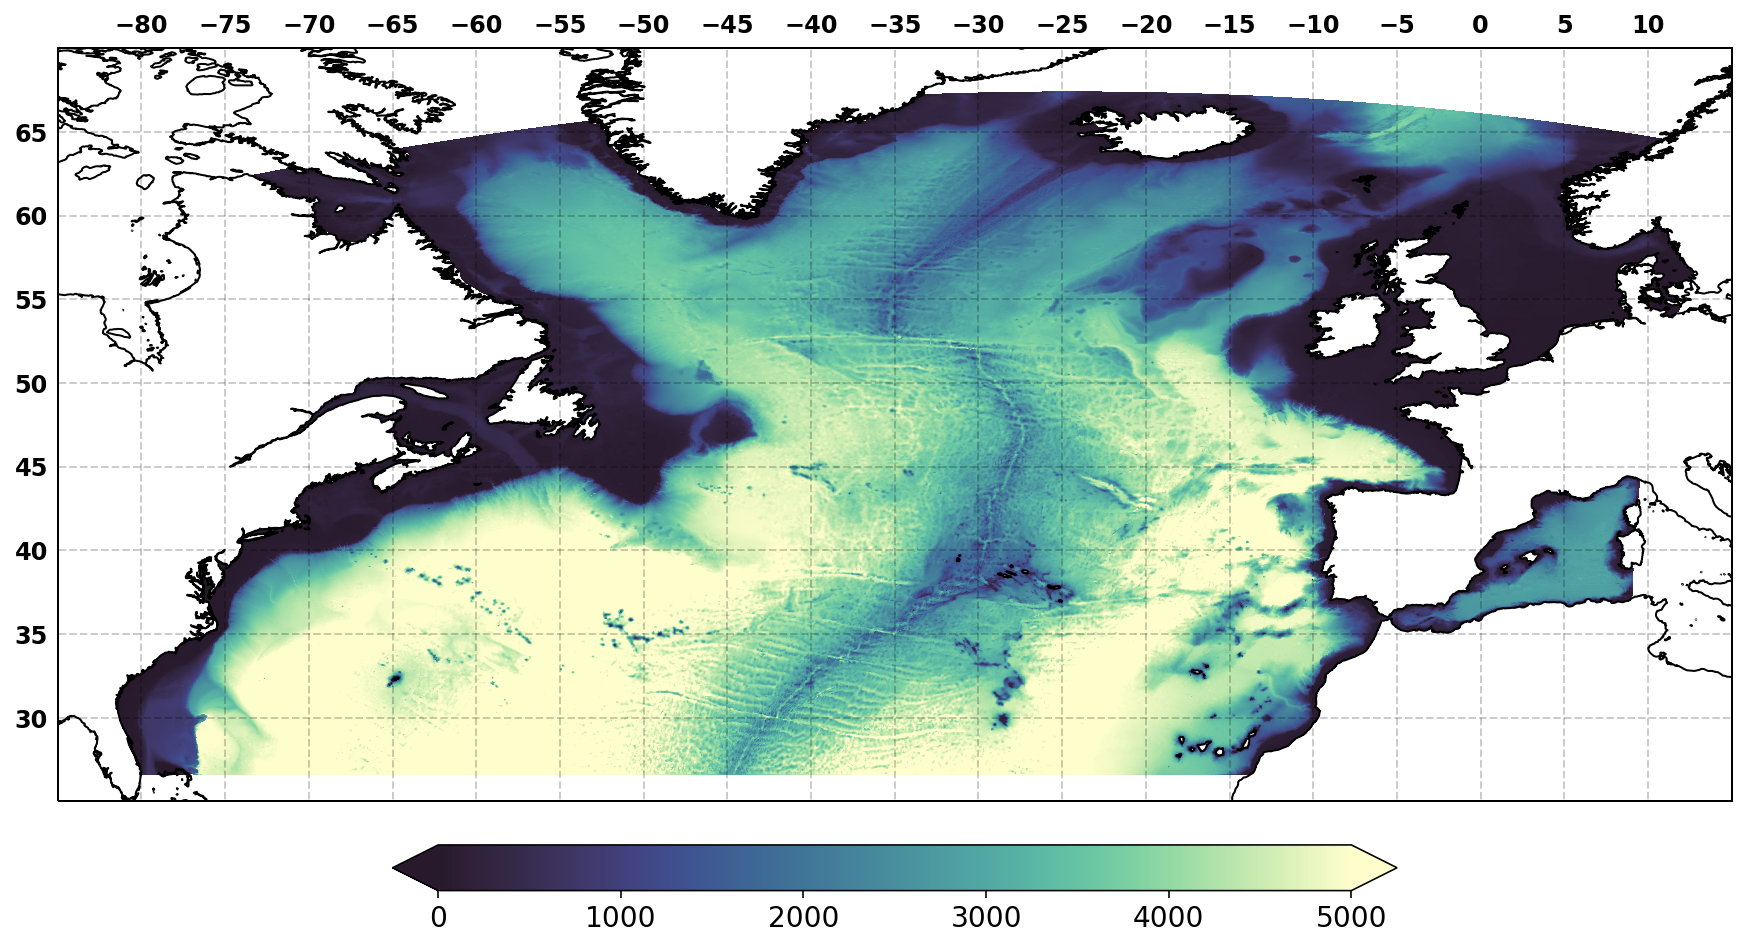

In [52]:
## see : http://iuryt.github.io/tutorial/Como_fazer_um_mapa02.html

data = depw.to_masked_array()
data = np.ma.masked_where(1-tmask,data)
lat = ds.nav_lat
lon = ds.nav_lon

#cmap = plt.get_cmap('tab20b')

cmap= cm.deep_r
vmin=0.
vmax=5000.

fig = north_atlantic_plot(lat=lat,lon=lon,data=data,vmin=vmin,vmax=vmax,cmap=cmap)

### Exporting the figure

In [53]:
fig.savefig(home + "/git/2017-paper-natl60-gmd/figures/NATL60_bathymetry.png", dpi=200, format="png",bbox_inches='tight')
